
# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [1]:
# ! pip install --quiet vietocr==0.3.2

In [2]:
# ! pip íntall einops

# Inference

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

import editdistance
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [4]:
config = Cfg.load_config_from_name('vgg_transformer')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [5]:
config['weights'] = '../model/model.pth'
config['cnn']['pretrained']=False
config['device'] = 'cpu'
config['predictor']['beamsearch']=False

In [6]:
detector = Predictor(config)

In [7]:
def loss_score(y_predict, y_label):
    score_list = []
    length_y = len(y_label)
    for key, value in y_label.items():                  
        score_list.append(editdistance.eval(y_predict[key] ,value)/len(value))
    return sum(score_list)/length_y

In [8]:
import json 

test_labels = json.load(open('../labels/labels_test.json'))
predict = {}

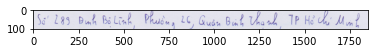

In [9]:
img = '../data/0001_samples.png'
img = Image.open(img)
plt.imshow(img)
test = detector.predict(img)

In [10]:
test

'Số 285 Đình Bỏ Lĩnh, Phuồng 25, Quân Bình Thạnh, Tp.Hồ Chí Minh'

In [11]:
for key, item in test_labels.items():
    img_path = "../private_test/" + key
    img = Image.open(img_path)
    predict[key] = detector.predict(img)

In [12]:
loss_score = loss_score(predict, test_labels)

In [14]:
loss_score

0.2309717961880506

In [18]:
import json

with open('labels.json', 'w') as fp:
    json.dump(predict, fp, ensure_ascii=False)

# TRAIN

In [1]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

In [2]:
config = Cfg.load_config_from_name('vgg_transformer')

In [16]:
dataset_params = {
    'name':'hw',
    'data_root':'./data_line/',
    'train_annotation':'train_line_annotation.txt',
    'valid_annotation':'test_line_annotation.txt'
}

params = {
         'print_every':1,
         'valid_every':15*200,
          'iters':20000,
#           'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',    
#           'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cpu'

In [10]:
dataset_params = {
    'name':'hw',
    'data_root':'./mydata/',
    'train_annotation':'train_text.txt',
    'valid_annotation':'test_text.txt'
}

params = {
         'print_every':5,
         'valid_every': 5,
          'iters': 50,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',    
          'export':'./weights/transformerocr.pth',
          'metrics': 25
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cpu'

In [17]:
config['dataloader'] ={'num_workers':0, 'pin_memory': True}

In [18]:
# config['cnn'] = {'pretrained': False,
#   'ss': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]],
#   'ks': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]],
#   'hidden': 256}

In [19]:
# config

In [1]:
# trainer = Trainer(config, pretrained=True)

In [ ]:
# trainer.visualize_dataset()

In [ ]:
# trainer.config.save('config.yml')

In [ ]:
# trainer.visualize_dataset()

In [ ]:
trainer.train()

In [ ]:
trainer

In [ ]:
trainer.save_weights('weights/model1.pth')